# Compare species and PFTs
author: Marianne Böhm

Data source: Sini-Selina Salkos measurements, published on Mendeley.
- Salko, Sini-Selina; Juola, Jussi; Burdun, Iuliia; Vasander, Harri; Hovi, Aarne; Rautiainen, Miina (2024), “Reflectance spectra of nine boreal Sphagnum moss species”, Mendeley Data, V3, doi: 10.17632/wm5fcxdmzd.3
- Salko, Sini-Selina; Hovi, Aarne; Juola, Jussi; Rautiainen, Miina (2024), “Spectral properties of 16 peatland plant species and litter”, Mendeley Data, V1, doi: 10.17632/kg7627wgp6.1
Steps:

## Goal:
Aiming to compare observations from peatland species, aggregate them to my understanding of plant functional/ physiognomy types, and check the variance within each of these types.
- open both files as tables and see what's in them
- make a list of plant functional type assignments.
- unite tables

### Settings and files

In [28]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

filedir = r"C:/Users/mabo6137/Documents/hyperspectral/Spectral_Library_Salko"

file1 = "SphagnumSp/Reflectance_spectra_of_nine_boreal_Sphagnum_moss_species_smoothed_V3.csv"
file2 = "PlantSp_and_Litter/Reflectance_and_transmittance_spectra_of_16_peatland_vascular_plant_species_smoothed.csv"
file3 = "PlantSp_and_Litter/Reflectance_spectra_of_peatland_litter_smoothed.csv"

fig_out = "C:/Users/mabo6137/Box/Fieldwork/previous data/SpeciesSpectralLibrary_SiniSelina/figures"

sns.set_theme(style="whitegrid", palette="husl")

### Sphagnum dataset
Steps: open (first three rows are headers), clean and assign pft = moss to all of them. Samples were measured several times (at fresh (0h, withing four to six hours after initial collection), after one day (24h), after two days (48h) and after one week (1w) of the sample collection) and I only want the fresh ones.

In [2]:
_sph = pd.read_csv(os.path.join(filedir, file1), header=3)
_sph

,Sample,Species,Sample_ID,Moisture_percent,Time,Location,wl350,wl351,wl352,wl353,...,wl2491,wl2492,wl2493,wl2494,wl2495,wl2496,wl2497,wl2498,wl2499,wl2500
0,Sphagnum_angustifolium_1_0h,Sphagnum angustifolium,1,87.349398,0h,Matkunsuo_Hyvinkaa,0.012969,0.012670,0.012411,0.012189,...,0.005173,0.005130,0.005078,0.005017,0.004945,0.004860,0.004763,0.004651,0.004524,0.004381
1,Sphagnum_angustifolium_1_1w,Sphagnum angustifolium,1,75.074184,1w,Matkunsuo_Hyvinkaa,0.022764,0.022243,0.021846,0.021563,...,0.181444,0.181303,0.181193,0.181112,0.181062,0.181040,0.181048,0.181084,0.181147,0.181239
2,Sphagnum_angustifolium_1_24h,Sphagnum angustifolium,1,91.316147,24h,Matkunsuo_Hyvinkaa,0.010235,0.010287,0.010316,0.010325,...,0.004150,0.004060,0.003989,0.003941,0.003923,0.003938,0.003992,0.004090,0.004236,0.004437
3,Sphagnum_angustifolium_1_48h,Sphagnum angustifolium,1,90.034364,48h,Matkunsuo_Hyvinkaa,0.016266,0.015986,0.015744,0.015539,...,0.039977,0.039865,0.039759,0.039660,0.039569,0.039488,0.039418,0.039360,0.039315,0.039285
4,Sphagnum_angustifolium_2_0h,Sphagnum angustifolium,2,92.888889,0h,Matkunsuo_Hyvinkaa,0.011717,0.011716,0.011682,0.011619,...,0.005553,0.005482,0.005413,0.005348,0.005290,0.005239,0.005199,0.005171,0.005158,0.005162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Sphagnum_rubellum_9_48h,Sphagnum rubellum,9,93.955224,48h,Luutasuo_Loppi,0.010370,0.010578,0.010732,0.010838,...,0.007288,0.007248,0.007205,0.007159,0.007111,0.007060,0.007007,0.006951,0.006893,0.006832
356,Sphagnum_rubellum_10_0h,Sphagnum rubellum,10,93.251974,0h,Luutasuo_Loppi,0.010774,0.010645,0.010516,0.010389,...,0.004170,0.004211,0.004263,0.004325,0.004398,0.004481,0.004576,0.004683,0.004801,0.004932
357,Sphagnum_rubellum_10_1w,Sphagnum rubellum,10,91.104294,1w,Luutasuo_Loppi,0.012618,0.012206,0.011845,0.011532,...,0.010823,0.010742,0.010668,0.010602,0.010548,0.010509,0.010487,0.010487,0.010510,0.010560
358,Sphagnum_rubellum_10_24h,Sphagnum rubellum,10,95.354406,24h,Luutasuo_Loppi,0.011360,0.010959,0.010614,0.010321,...,0.004596,0.004585,0.004580,0.004584,0.004597,0.004620,0.004654,0.004702,0.004764,0.004841


In [4]:
#check if there are NA's in any entry --> no
pd.isna(_sph).any().any()

False

In [5]:
# show time column
_sph.Time.unique()
# keep only fresh samples
_sph= _sph.loc[_sph.Time == '0h']

In [6]:
# check locations --> are any in permafrost? --> all of them seem to be around Helsinki 
_sph.Location.unique()

array(['Matkunsuo_Hyvinkaa', 'Slattmossen_Kirkkonummi', 'Luutasuo_Loppi',
       'Ritasaarensuo_Hyvinkaa'], dtype=object)

In [ ]:
# remove unnecessary columns
sph = (_sph
        .assign(PFT="moss")
        .drop(["Moisture_percent", "Time", "Sample_ID"], axis="columns")
        )
# TODO: assign a useful unique ID, save to variable
sph

,Sample,Species,Location,wl350,wl351,wl352,wl353,wl354,wl355,wl356,...,wl2492,wl2493,wl2494,wl2495,wl2496,wl2497,wl2498,wl2499,wl2500,PFT
0,Sphagnum_angustifolium_1_0h,Sphagnum angustifolium,Matkunsuo_Hyvinkaa,0.012969,0.012670,0.012411,0.012189,0.012002,0.011846,0.011720,...,0.005130,0.005078,0.005017,0.004945,0.004860,0.004763,0.004651,0.004524,0.004381,moss
1,Sphagnum_angustifolium_1_1w,Sphagnum angustifolium,Matkunsuo_Hyvinkaa,0.022764,0.022243,0.021846,0.021563,0.021384,0.021300,0.021302,...,0.181303,0.181193,0.181112,0.181062,0.181040,0.181048,0.181084,0.181147,0.181239,moss
2,Sphagnum_angustifolium_1_24h,Sphagnum angustifolium,Matkunsuo_Hyvinkaa,0.010235,0.010287,0.010316,0.010325,0.010315,0.010288,0.010245,...,0.004060,0.003989,0.003941,0.003923,0.003938,0.003992,0.004090,0.004236,0.004437,moss
3,Sphagnum_angustifolium_1_48h,Sphagnum angustifolium,Matkunsuo_Hyvinkaa,0.016266,0.015986,0.015744,0.015539,0.015367,0.015228,0.015120,...,0.039865,0.039759,0.039660,0.039569,0.039488,0.039418,0.039360,0.039315,0.039285,moss
4,Sphagnum_angustifolium_2_0h,Sphagnum angustifolium,Matkunsuo_Hyvinkaa,0.011717,0.011716,0.011682,0.011619,0.011531,0.011422,0.011297,...,0.005482,0.005413,0.005348,0.005290,0.005239,0.005199,0.005171,0.005158,0.005162,moss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Sphagnum_rubellum_9_48h,Sphagnum rubellum,Luutasuo_Loppi,0.010370,0.010578,0.010732,0.010838,0.010900,0.010922,0.010910,...,0.007248,0.007205,0.007159,0.007111,0.007060,0.007007,0.006951,0.006893,0.006832,moss
356,Sphagnum_rubellum_10_0h,Sphagnum rubellum,Luutasuo_Loppi,0.010774,0.010645,0.010516,0.010389,0.010265,0.010144,0.010028,...,0.004211,0.004263,0.004325,0.004398,0.004481,0.004576,0.004683,0.004801,0.004932,moss
357,Sphagnum_rubellum_10_1w,Sphagnum rubellum,Luutasuo_Loppi,0.012618,0.012206,0.011845,0.011532,0.011264,0.011037,0.010848,...,0.010742,0.010668,0.010602,0.010548,0.010509,0.010487,0.010487,0.010510,0.010560,moss
358,Sphagnum_rubellum_10_24h,Sphagnum rubellum,Luutasuo_Loppi,0.011360,0.010959,0.010614,0.010321,0.010075,0.009874,0.009713,...,0.004585,0.004580,0.004584,0.004597,0.004620,0.004654,0.004702,0.004764,0.004841,moss


### Vascular plants

Measurements were taken in several leaf orientations and both reflectance (R) and transmittance (T).
It seems that the info on Graminoids will not suffice for between-species variance but shrubs and herbaceous plants will be interesting.


The following species are there:
| Scientific Name                            | Type       | English Name(s)                  |
| ------------------------------------------ | ---------- | -------------------------------- |
| Phalaris arundinacea (L.) Rauschert        | Graminoid  | Reed Canary Grass                |
| Calla palustris L.                         | Herbaceous | Water Arum, Bog Arum             |
| Caltha palustris L.                        | Herbaceous | Marsh Marigold, Kingcup          |
| Comarum palustre L. (Potentilla palustris) | Herbaceous | Marsh Cinquefoil                 |
| Filipendula ulmaria (L.) Maxim.            | Herbaceous | Meadowsweet                      |
| Menyanthes trifoliata L.                   | Herbaceous | Bogbean, Buckbean                |
| Ranunculus repens L.                       | Herbaceous | Creeping Buttercup               |
| Rubus chamaemorus L.                       | Herbaceous | Cloudberry                       |
| Viola palustris L.                         | Herbaceous | Marsh Violet                     |
| Betula nana L.                             | Shrub      | Dwarf Birch                      |
| Chamaedaphne calyculata (L.) Moench        | Shrub      | Leatherleaf                      |
| Salix lapponum L.                          | Shrub      | Downy Willow                     |
| Salix sp. L.                               | Shrub      | Willow (various species)         |
| Vaccinium myrtillus L.                     | Shrub      | Bilberry, Blueberry              |
| Vaccinium uliginosum L.                    | Shrub      | Bog Blueberry, Northern Bilberry |
| Vaccinium vitis-idaea L.                   | Shrub      | Lingonberry, Cowberry            |


Something seems to be wrong with the date values but we don't need them right now.


In [4]:
_vas = pd.read_csv(os.path.join(filedir, file2), header=2)
# keep only reflectance measurements
_vas = _vas.loc[_vas.Quantity=="R"]
_vas

,Species,Side,Quantity,Site,Country,Date,Sample_ID,wl350,wl351,wl352,...,wl2491,wl2492,wl2493,wl2494,wl2495,wl2496,wl2497,wl2498,wl2499,wl2500
0,Viola_palustris,Adaxial,R,Fastholma_Helsinki,Finland,27/06/2022,1,-0.220621,-0.162708,-0.111139,...,0.500599,0.512163,0.524017,0.536159,0.548591,0.561312,0.574323,0.587623,0.601212,0.615091
1,Viola_palustris,Adaxial,R,Fastholma_Helsinki,Finland,27/06/2022,2,-0.076165,-0.037444,-0.002951,...,0.363905,0.392544,0.421931,0.452067,0.482952,0.514585,0.546966,0.580096,0.613975,0.648602
2,Viola_palustris,Adaxial,R,Fastholma_Helsinki,Finland,27/06/2022,3,-0.198920,-0.140904,-0.088924,...,1.901380,1.957314,2.014125,2.071812,2.130375,2.189814,2.250129,2.311320,2.373388,2.436331
3,Viola_palustris,Adaxial,R,Fastholma_Helsinki,Finland,27/06/2022,4,0.240557,0.168457,0.105605,...,51.145470,54.768337,58.488161,62.304943,66.218681,70.229377,74.337031,78.541641,82.843209,87.241734
4,Viola_palustris,Adaxial,R,Fastholma_Helsinki,Finland,27/06/2022,5,0.103656,0.113624,0.121285,...,2.232456,2.405632,2.583477,2.765990,2.953171,3.145020,3.341537,3.542723,3.748576,3.959098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Vaccinium_myrtillus,Abaxial,R,Jatuninkangas_Enontekio,Finland,11-12/07/2027,140,0.034867,0.038716,0.042001,...,31.517002,33.193848,34.909193,36.663035,38.455375,40.286213,42.155548,44.063381,46.009712,47.994540
284,Vaccinium_myrtillus,Abaxial,R,Jatuninkangas_Enontekio,Finland,11-12/07/2028,141,0.069085,0.056859,0.045157,...,50.625059,53.324459,56.086222,58.910348,61.796838,64.745691,67.756908,70.830489,73.966432,77.164740
285,Vaccinium_myrtillus,Abaxial,R,Jatuninkangas_Enontekio,Finland,11-12/07/2029,142,0.112948,0.098990,0.086359,...,3.098781,3.181102,3.264401,3.348680,3.433937,3.520173,3.607388,3.695582,3.784754,3.874905
286,Vaccinium_myrtillus,Abaxial,R,Jatuninkangas_Enontekio,Finland,11-12/07/2030,143,0.157026,0.149573,0.142517,...,-0.490867,-0.430762,-0.368129,-0.302970,-0.235282,-0.165068,-0.092325,-0.017056,0.060742,0.141066


In [9]:
# check if multiple sites exist for each plant -> no
_vas.groupby("Species").Site.unique()
# no NAs either
pd.isna(_vas).any().any()

False

In [5]:
species_to_pft_dict = {
    "Viola_palustris": "herb",
    "Filipendula_ulmaria": "herb",
    "Caltha_palustris": "herb",
    "Vaccinum_uliginosum": "shrub",
    "Betula_nana": "shrub",
    "Rubus_chamaemorus": "herb",
    "Menyanthes_trifoliata": "herb",
    "Calla_palustris": "herb",
    "Chamaedaphne_calyculata": "shrub",
    "Phalaroides_arundinacea": "graminoid",
    "Ranunculus_repens": "herb",
    "Salix_sp": "shrub",
    "Comarum_palustre": "herb",
    "Vaccinium_vitis-idaea": "shrub",
    "Salix_lapponum": "shrub",
    "Vaccinium_myrtillus": "shrub",
}

In [ ]:
_vas.Side.str.slice(0,2)
#Todo implement

0      Ad
1      Ad
2      Ad
3      Ad
4      Ad
       ..
283    Ab
284    Ab
285    Ab
286    Ab
287    Ab
Name: Side, Length: 288, dtype: object

In [6]:
vas = (
    _vas.assign(  # add columns that specify PFT and identify the sample.
        PFT=_vas.Species.map(species_to_pft_dict),
        Sample=_vas.Species.str.cat(
            _vas.Sample_ID.astype("string").str.zfill(
                3
            ),  # add _vas.Side.str.slice(0, 2) to add Side information.
            join="left",
            sep="_",
        ),
    )
    .drop(["Quantity", "Country", "Date", "Sample_ID"], axis="columns")
    .rename(columns={"Site": "Location"})
)
vas
# TODO: make new column "Sample", vas_[sampleID]

,Species,Side,Location,wl350,wl351,wl352,wl353,wl354,wl355,wl356,...,wl2493,wl2494,wl2495,wl2496,wl2497,wl2498,wl2499,wl2500,PFT,Sample
0,Viola_palustris,Adaxial,Fastholma_Helsinki,-0.220621,-0.162708,-0.111139,-0.065915,-0.027035,0.005501,0.031692,...,0.524017,0.536159,0.548591,0.561312,0.574323,0.587623,0.601212,0.615091,herb,Viola_palustris_001
1,Viola_palustris,Adaxial,Fastholma_Helsinki,-0.076165,-0.037444,-0.002951,0.027315,0.053354,0.075165,0.092750,...,0.421931,0.452067,0.482952,0.514585,0.546966,0.580096,0.613975,0.648602,herb,Viola_palustris_002
2,Viola_palustris,Adaxial,Fastholma_Helsinki,-0.198920,-0.140904,-0.088924,-0.042981,-0.003073,0.030799,0.058634,...,2.014125,2.071812,2.130375,2.189814,2.250129,2.311320,2.373388,2.436331,herb,Viola_palustris_003
3,Viola_palustris,Adaxial,Fastholma_Helsinki,0.240557,0.168457,0.105605,0.051999,0.007640,-0.027472,-0.053337,...,58.488161,62.304943,66.218681,70.229377,74.337031,78.541641,82.843209,87.241734,herb,Viola_palustris_004
4,Viola_palustris,Adaxial,Fastholma_Helsinki,0.103656,0.113624,0.121285,0.126641,0.129690,0.130434,0.128871,...,2.583477,2.765990,2.953171,3.145020,3.341537,3.542723,3.748576,3.959098,herb,Viola_palustris_005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Vaccinium_myrtillus,Abaxial,Jatuninkangas_Enontekio,0.034867,0.038716,0.042001,0.044723,0.046881,0.048475,0.049505,...,34.909193,36.663035,38.455375,40.286213,42.155548,44.063381,46.009712,47.994540,shrub,Vaccinium_myrtillus_140
284,Vaccinium_myrtillus,Abaxial,Jatuninkangas_Enontekio,0.069085,0.056859,0.045157,0.033978,0.023322,0.013190,0.003582,...,56.086222,58.910348,61.796838,64.745691,67.756908,70.830489,73.966432,77.164740,shrub,Vaccinium_myrtillus_141
285,Vaccinium_myrtillus,Abaxial,Jatuninkangas_Enontekio,0.112948,0.098990,0.086359,0.075053,0.065075,0.056422,0.049096,...,3.264401,3.348680,3.433937,3.520173,3.607388,3.695582,3.784754,3.874905,shrub,Vaccinium_myrtillus_142
286,Vaccinium_myrtillus,Abaxial,Jatuninkangas_Enontekio,0.157026,0.149573,0.142517,0.135860,0.129600,0.123739,0.118276,...,-0.368129,-0.302970,-0.235282,-0.165068,-0.092325,-0.017056,0.060742,0.141066,shrub,Vaccinium_myrtillus_143


### Litter Dataset
"mostly comprised of dead sedge (Carex spp)" -> not sure what to make of this.

In [7]:
_lit = pd.read_csv(os.path.join(filedir, file3), header=2)
_lit

,Site,Country,Date,Fresh_or_dry,Sample_ID,wl350,wl351,wl352,wl353,wl354,...,wl2491,wl2492,wl2493,wl2494,wl2495,wl2496,wl2497,wl2498,wl2499,wl2500
0,Vaipo_Kirkkonummi,Finland,09/11/2023,Fresh,1,0.035610,0.035625,0.035650,0.035686,0.035733,...,0.124429,0.124141,0.123861,0.123590,0.123327,0.123072,0.122826,0.122588,0.122358,0.122137
1,Vaipo_Kirkkonummi,Finland,09/11/2023,Fresh,2,0.024369,0.024301,0.024243,0.024196,0.024159,...,0.086368,0.086153,0.085947,0.085748,0.085556,0.085372,0.085195,0.085026,0.084865,0.084711
2,Vaipo_Kirkkonummi,Finland,09/11/2023,Fresh,3,0.035633,0.035500,0.035410,0.035361,0.035355,...,0.128946,0.128621,0.128306,0.127999,0.127703,0.127415,0.127137,0.126869,0.126610,0.126360
3,Vaipo_Kirkkonummi,Finland,09/11/2023,Fresh,4,0.015864,0.016017,0.016151,0.016266,0.016361,...,0.039645,0.039516,0.039391,0.039270,0.039153,0.039040,0.038931,0.038826,0.038725,0.038627
4,Vaipo_Kirkkonummi,Finland,09/11/2023,Fresh,5,0.028037,0.027878,0.027741,0.027626,0.027533,...,0.084947,0.084710,0.084481,0.084258,0.084043,0.083834,0.083632,0.083438,0.083250,0.083070
5,Vaipo_Kirkkonummi,Finland,09/11/2023,Fresh,6,0.022413,0.022324,0.022251,0.022193,0.022150,...,0.069177,0.069010,0.068848,0.068691,0.068540,0.068395,0.068254,0.068119,0.067990,0.067866
6,Vaipo_Kirkkonummi,Finland,09/11/2023,Fresh,7,0.032722,0.032813,0.032894,0.032965,0.033024,...,0.104407,0.104149,0.103900,0.103658,0.103424,0.103197,0.102979,0.102769,0.102566,0.102371
7,Vaipo_Kirkkonummi,Finland,09/11/2023,Fresh,8,0.019290,0.019312,0.019337,0.019365,0.019395,...,0.051006,0.050847,0.050693,0.050544,0.050400,0.050260,0.050126,0.049996,0.049871,0.049751
8,Vaipo_Kirkkonummi,Finland,09/11/2023,Fresh,9,0.031078,0.030799,0.030550,0.030332,0.030144,...,0.102806,0.102555,0.102314,0.102083,0.101860,0.101647,0.101443,0.101249,0.101064,0.100888
9,Vaipo_Kirkkonummi,Finland,09/11/2023,Fresh,10,0.028551,0.028439,0.028347,0.028277,0.028229,...,0.094216,0.093972,0.093735,0.093505,0.093282,0.093067,0.092858,0.092658,0.092464,0.092278


## Unite Datasets
1. Combine herbaceous, shrub, and moss datasets. They all should have a unique identifier, a species, and a PFT column.
2. Transform wavelength columns in a way that I can plot them (remove "w", make integer, and stack/pivot)
3. Analyze within-species, within-PFT, and between-PFT variance of a yet-to-define metric. 

In [79]:
df = pd.concat([sph, vas])
df["Side"] = df["Side"].fillna("unknown")
#del _vas, _sph, _lit # did nothing with litter dataset yet, but for later
df

,Sample,Species,Location,wl350,wl351,wl352,wl353,wl354,wl355,wl356,...,wl2493,wl2494,wl2495,wl2496,wl2497,wl2498,wl2499,wl2500,PFT,Side
0,Sphagnum_angustifolium_1_0h,Sphagnum angustifolium,Matkunsuo_Hyvinkaa,0.012969,0.012670,0.012411,0.012189,0.012002,0.011846,0.011720,...,0.005078,0.005017,0.004945,0.004860,0.004763,0.004651,0.004524,0.004381,moss,unknown
1,Sphagnum_angustifolium_1_1w,Sphagnum angustifolium,Matkunsuo_Hyvinkaa,0.022764,0.022243,0.021846,0.021563,0.021384,0.021300,0.021302,...,0.181193,0.181112,0.181062,0.181040,0.181048,0.181084,0.181147,0.181239,moss,unknown
2,Sphagnum_angustifolium_1_24h,Sphagnum angustifolium,Matkunsuo_Hyvinkaa,0.010235,0.010287,0.010316,0.010325,0.010315,0.010288,0.010245,...,0.003989,0.003941,0.003923,0.003938,0.003992,0.004090,0.004236,0.004437,moss,unknown
3,Sphagnum_angustifolium_1_48h,Sphagnum angustifolium,Matkunsuo_Hyvinkaa,0.016266,0.015986,0.015744,0.015539,0.015367,0.015228,0.015120,...,0.039759,0.039660,0.039569,0.039488,0.039418,0.039360,0.039315,0.039285,moss,unknown
4,Sphagnum_angustifolium_2_0h,Sphagnum angustifolium,Matkunsuo_Hyvinkaa,0.011717,0.011716,0.011682,0.011619,0.011531,0.011422,0.011297,...,0.005413,0.005348,0.005290,0.005239,0.005199,0.005171,0.005158,0.005162,moss,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Vaccinium_myrtillus_140,Vaccinium_myrtillus,Jatuninkangas_Enontekio,0.034867,0.038716,0.042001,0.044723,0.046881,0.048475,0.049505,...,34.909193,36.663035,38.455375,40.286213,42.155548,44.063381,46.009712,47.994540,shrub,Abaxial
284,Vaccinium_myrtillus_141,Vaccinium_myrtillus,Jatuninkangas_Enontekio,0.069085,0.056859,0.045157,0.033978,0.023322,0.013190,0.003582,...,56.086222,58.910348,61.796838,64.745691,67.756908,70.830489,73.966432,77.164740,shrub,Abaxial
285,Vaccinium_myrtillus_142,Vaccinium_myrtillus,Jatuninkangas_Enontekio,0.112948,0.098990,0.086359,0.075053,0.065075,0.056422,0.049096,...,3.264401,3.348680,3.433937,3.520173,3.607388,3.695582,3.784754,3.874905,shrub,Abaxial
286,Vaccinium_myrtillus_143,Vaccinium_myrtillus,Jatuninkangas_Enontekio,0.157026,0.149573,0.142517,0.135860,0.129600,0.123739,0.118276,...,-0.368129,-0.302970,-0.235282,-0.165068,-0.092325,-0.017056,0.060742,0.141066,shrub,Abaxial


In [80]:
df.rename(columns = lambda x: x.removeprefix("wl"), inplace=True) # rename all wavelength columns to use proper ints

## Analyze within-species variation
- compute overall standard deviation
- compute standard deviation per band
- visualize single species with boxplots

In [10]:
# standard deviations of all Species across all wavelengths
df.groupby("Species").std(numeric_only=True)

,wl350,wl351,wl352,wl353,wl354,wl355,wl356,wl357,wl358,wl359,...,wl2491,wl2492,wl2493,wl2494,wl2495,wl2496,wl2497,wl2498,wl2499,wl2500
Species,,,,,,,,,,,,,,,,,,,,,
Betula_nana,0.066564,0.061930,0.058843,0.056869,0.055538,0.054416,0.053145,0.051459,0.046173,0.042113,...,32.139843,33.870516,35.658794,37.503982,39.405452,41.362641,43.375040,45.442192,47.563683,49.739140
Calla_palustris,0.080646,0.069599,0.061555,0.056096,0.052514,0.049953,0.047598,0.044807,0.039467,0.032645,...,36.357248,38.897825,41.512514,44.200804,46.962269,49.796551,52.703346,55.682394,58.733475,61.856397
Caltha_palustris,0.064210,0.059156,0.055987,0.054127,0.052960,0.051936,0.050630,0.048749,0.046568,0.039682,...,40.636639,43.011212,45.457269,47.974131,50.561203,53.217964,55.943956,58.738773,61.602058,64.533493
Chamaedaphne_calyculata,0.079828,0.070395,0.062074,0.054796,0.048468,0.042976,0.038196,0.034007,0.028485,0.025146,...,6.339955,6.573772,6.815221,7.064312,7.321055,7.585451,7.857501,8.137199,8.424539,8.719514
Comarum_palustre,0.063866,0.050308,0.040165,0.033580,0.030211,0.029046,0.028844,0.028735,0.027652,0.029884,...,0.542366,0.574515,0.608465,0.644154,0.681525,0.720529,0.761118,0.803251,0.846892,0.892008
Filipendula_ulmaria,0.056818,0.047707,0.041645,0.038453,0.037480,0.037793,0.038537,0.039129,0.038873,0.037912,...,51.931561,53.896706,55.910865,57.974045,60.086243,62.247452,64.457659,66.716847,69.024994,71.382078
Menyanthes_trifoliata,0.105087,0.084296,0.066761,0.052710,0.042364,0.035706,0.032121,0.030360,0.029968,0.030542,...,17.902296,19.072459,20.276215,21.513342,22.783652,24.086983,25.423198,26.792177,28.193818,29.628029
Phalaroides_arundinacea,0.064659,0.059410,0.055179,0.051707,0.048721,0.045964,0.043220,0.040337,0.033936,0.030788,...,29.683726,31.654361,33.676823,35.751065,37.877051,40.054747,42.284125,44.565163,46.897840,49.282138
Ranunculus_repens,0.058007,0.047378,0.039508,0.034456,0.031885,0.031012,0.030890,0.030740,0.031161,0.029138,...,18.492537,19.812776,21.175717,22.580765,24.027422,25.515272,27.043961,28.613188,30.222698,31.872270


In [15]:
# visualize one species: betula nana
subset = df.loc[df.Species == "Betula_nana"].melt(id_vars=["Sample", "Location", "Species", "PFT", "Side"],
                                                  var_name="wavelength_nm", value_name="reflectance")
subset["wavelength_nm"] = subset["wavelength_nm"].astype('float32')

# keep reflectance values within reasonable values
subset["reflectance"] = subset["reflectance"].where(subset.reflectance <= 1).where(subset.reflectance >= 0)
subset

,Sample,Location,Species,PFT,Side,wavelength_nm,reflectance
0,Betula_nana_037,Soidensuo_Kirkkonummi,Betula_nana,shrub,Adaxial,350.0,NaN
1,Betula_nana_038,Soidensuo_Kirkkonummi,Betula_nana,shrub,Adaxial,350.0,0.100345
2,Betula_nana_039,Soidensuo_Kirkkonummi,Betula_nana,shrub,Adaxial,350.0,NaN
3,Betula_nana_040,Soidensuo_Kirkkonummi,Betula_nana,shrub,Adaxial,350.0,0.169189
4,Betula_nana_041,Soidensuo_Kirkkonummi,Betula_nana,shrub,Adaxial,350.0,0.061638
...,...,...,...,...,...,...,...
38713,Betula_nana_041,Soidensuo_Kirkkonummi,Betula_nana,shrub,Abaxial,2500.0,NaN
38714,Betula_nana_042,Soidensuo_Kirkkonummi,Betula_nana,shrub,Abaxial,2500.0,NaN
38715,Betula_nana_043,Soidensuo_Kirkkonummi,Betula_nana,shrub,Abaxial,2500.0,NaN
38716,Betula_nana_044,Soidensuo_Kirkkonummi,Betula_nana,shrub,Abaxial,2500.0,NaN


In [132]:
subset.dtypes


Sample          object
Location        object
Species         object
PFT             object
Side            object
wavelength     float32
reflectance    float64
dtype: object

In [16]:
subset_var = subset.groupby("wavelength_nm").std(numeric_only=True)

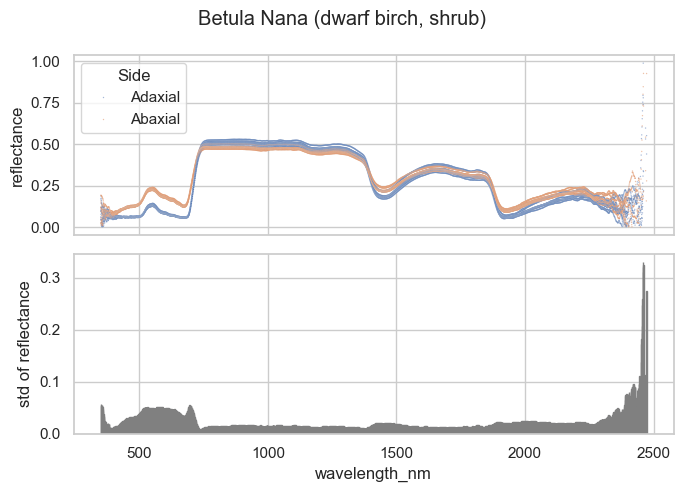

In [ ]:
sns.set_style("whitegrid")
graph, (ax1, ax2) = plt.subplots(2,1, figsize = (7,5), sharex=True)
graph.suptitle("Betula Nana (dwarf birch, shrub)")
ax2.set_ylabel("std of reflectance")
sns.scatterplot(data=subset, x="wavelength_nm", y="reflectance", hue="Side", s=1, alpha=.5, ax=ax1)
sns.barplot(data = subset, x="wavelength_nm", y = "reflectance", errorbar=None, estimator="std", native_scale=True, edgecolor="grey", alpha=1.0, ax=ax2)

plt.tight_layout()
plt.show()

# this worked!

plotting SHRUB: Betula nana
plotting HERB: Calla palustris
plotting HERB: Caltha palustris
plotting SHRUB: Chamaedaphne calyculata
plotting HERB: Comarum palustre
plotting HERB: Filipendula ulmaria
plotting HERB: Menyanthes trifoliata
plotting GRAMINOID: Phalaroides arundinacea
plotting HERB: Ranunculus repens
plotting HERB: Rubus chamaemorus
plotting SHRUB: Salix lapponum
plotting SHRUB: Salix sp
plotting MOSS: Sphagnum angustifolium
plotting MOSS: Sphagnum capillifolium
plotting MOSS: Sphagnum centrale
plotting MOSS: Sphagnum cuspidatum
plotting MOSS: Sphagnum fallax
plotting MOSS: Sphagnum fuscum
plotting MOSS: Sphagnum girgensohnii
plotting MOSS: Sphagnum riparium
plotting MOSS: Sphagnum rubellum


C:\Users\mabo6137\AppData\Local\Temp\ipykernel_17184\1916419292.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  graph, (ax1, ax2) = plt.subplots(2,1, figsize = (7,5), sharex=True)


plotting SHRUB: Vaccinium myrtillus
plotting SHRUB: Vaccinium vitis-idaea
plotting SHRUB: Vaccinum uliginosum
plotting HERB: Viola palustris


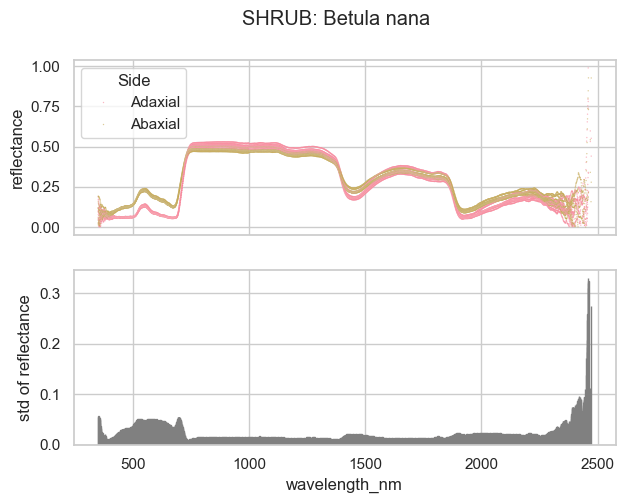

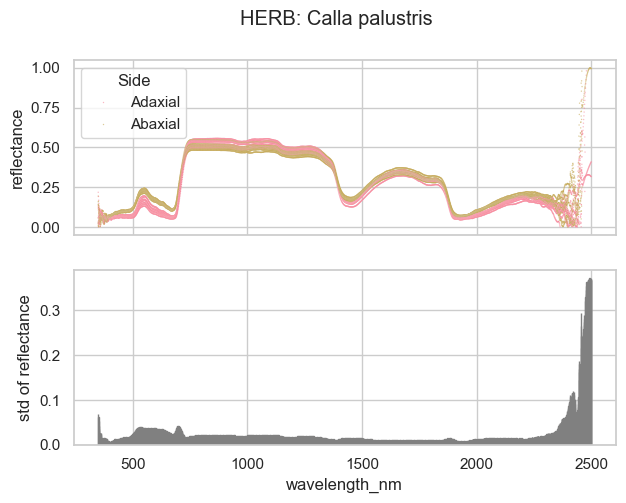

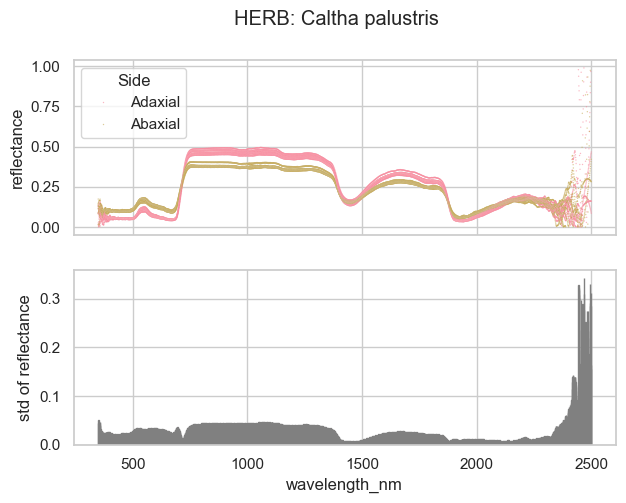

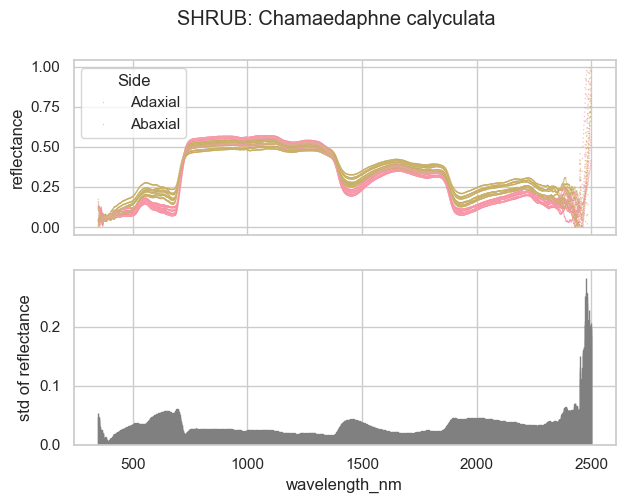

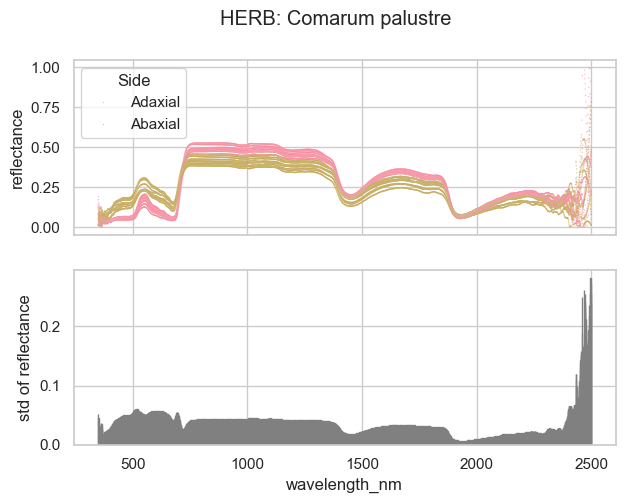

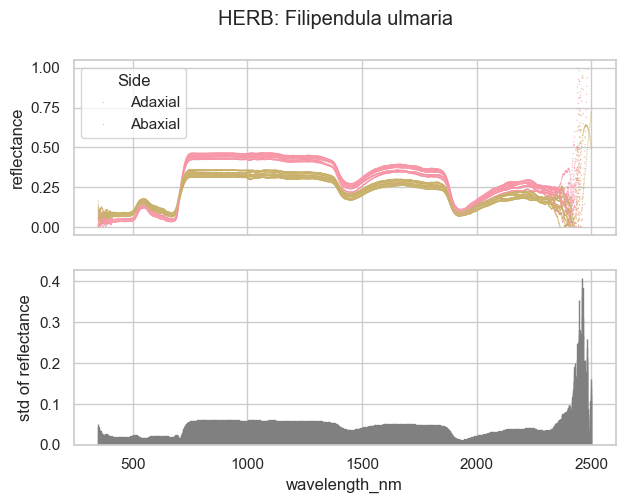

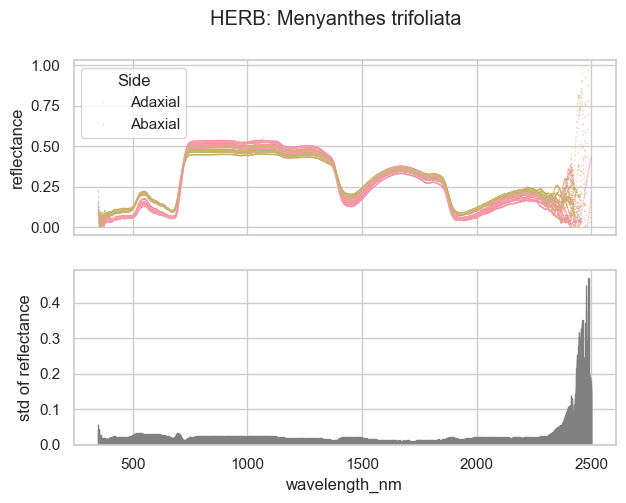

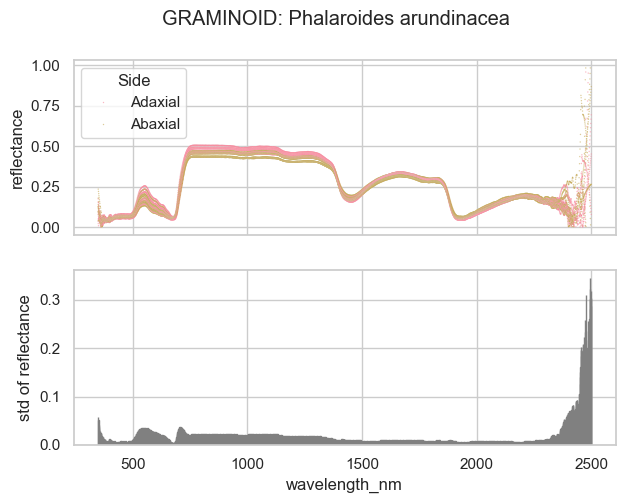

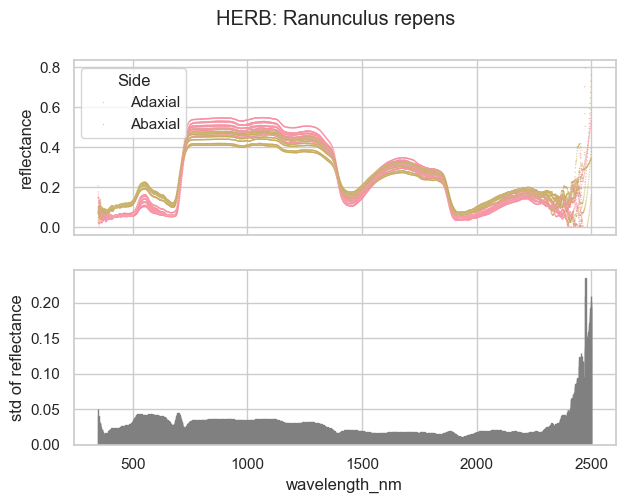

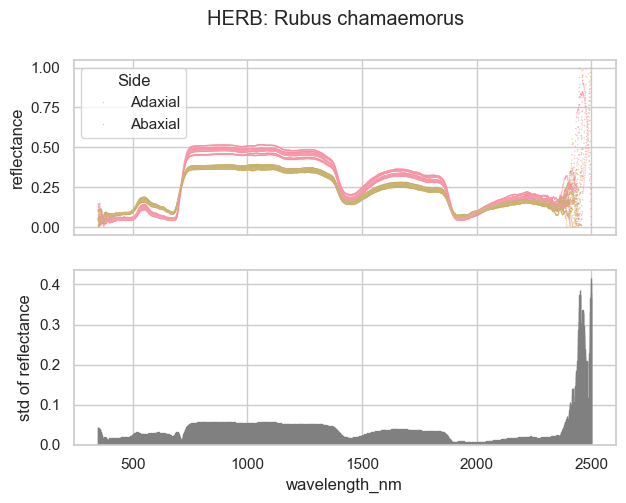

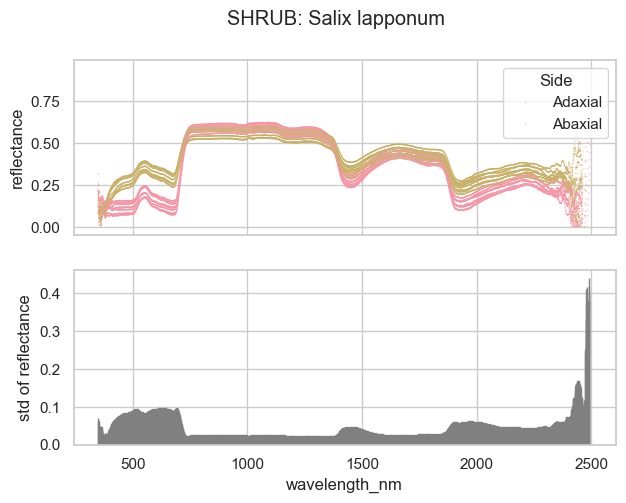

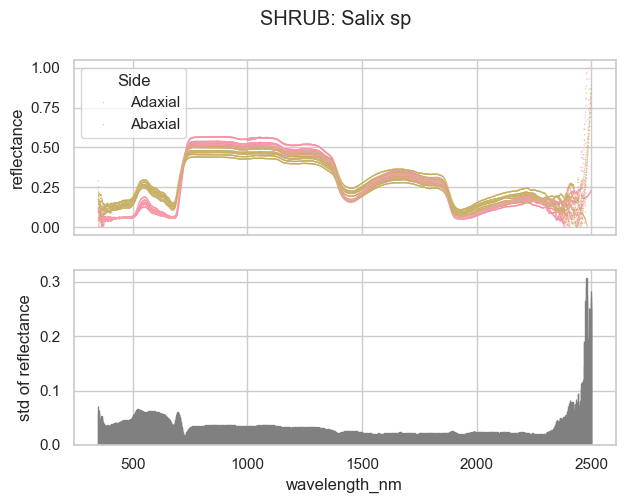

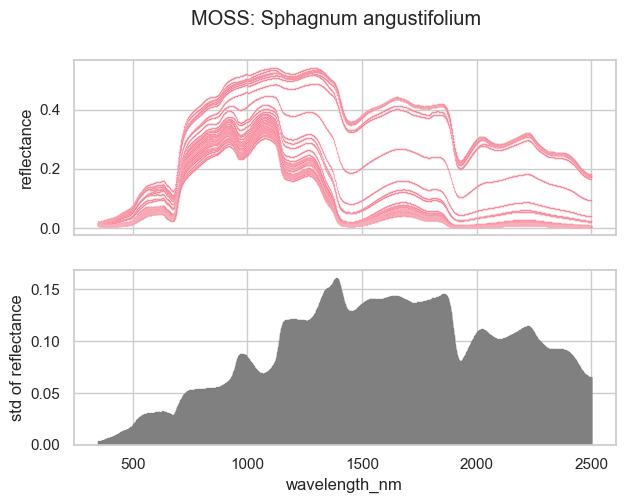

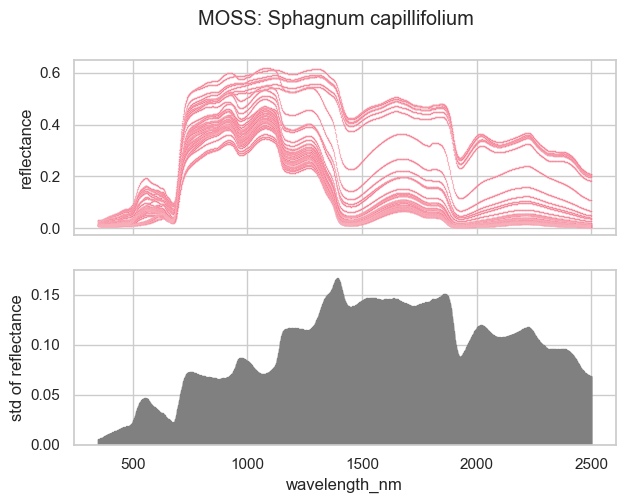

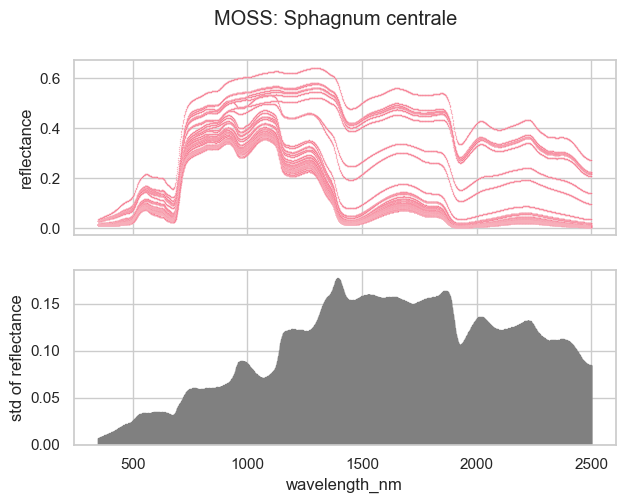

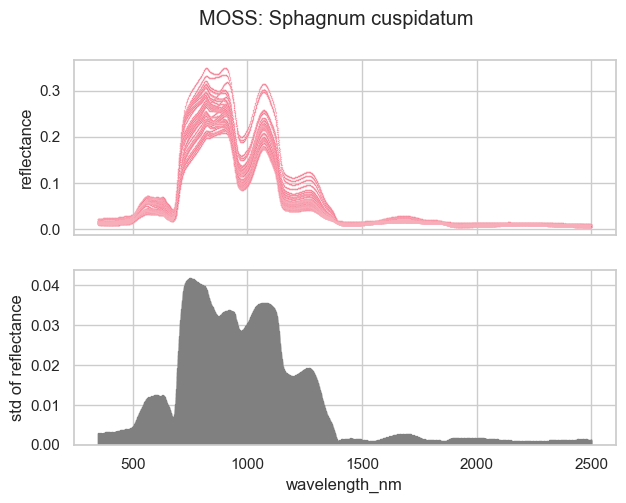

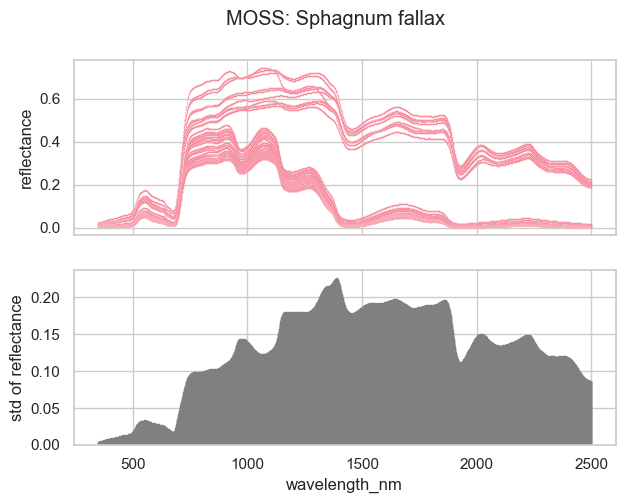

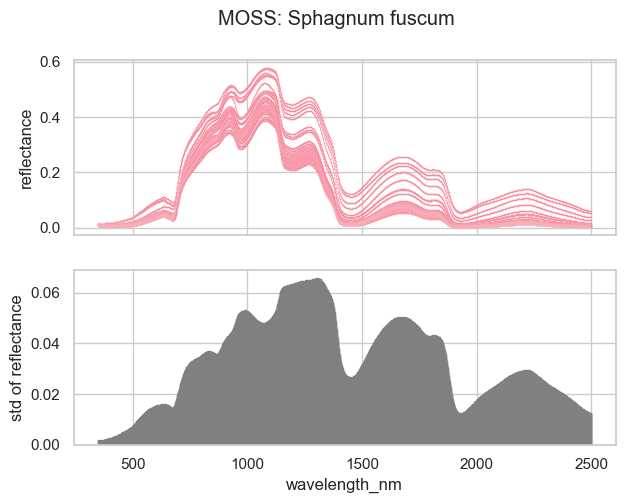

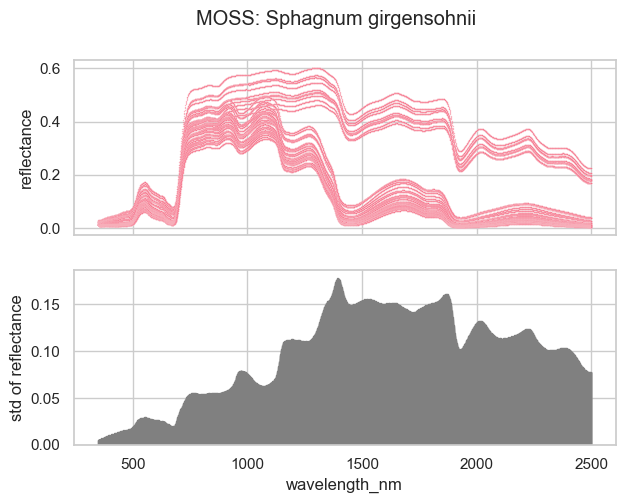

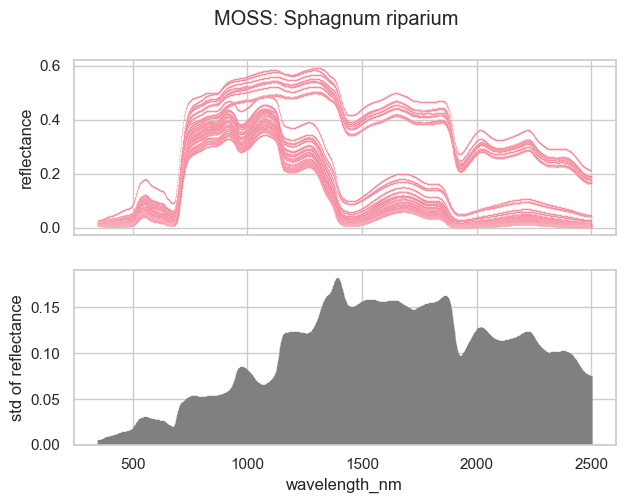

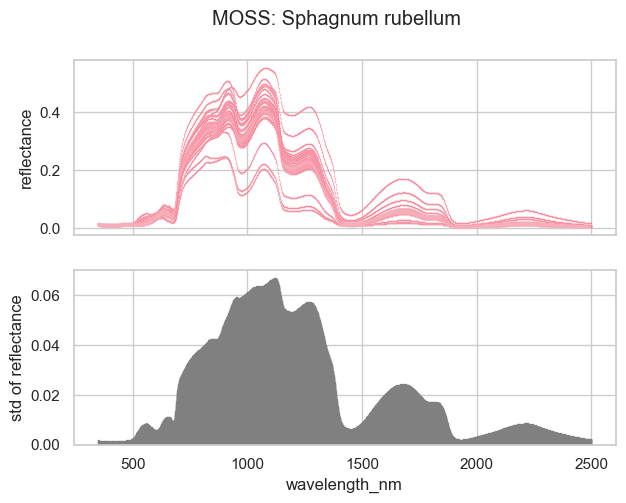

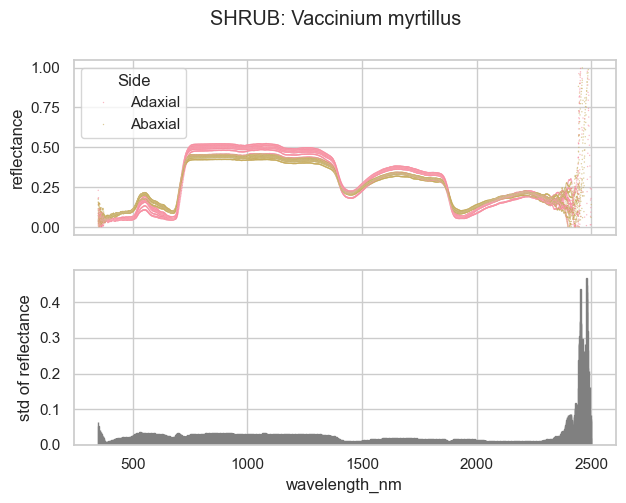

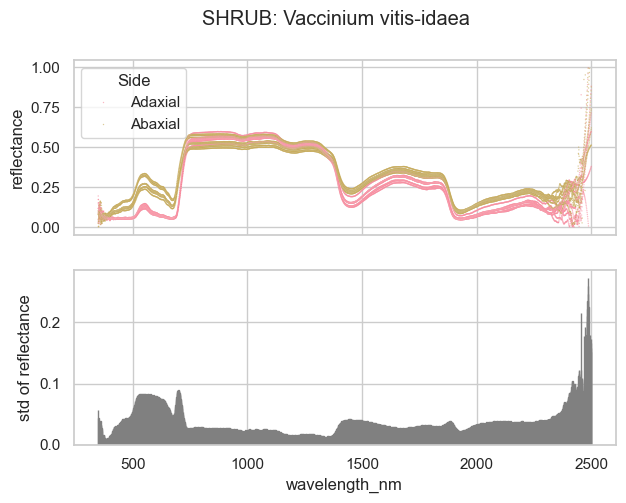

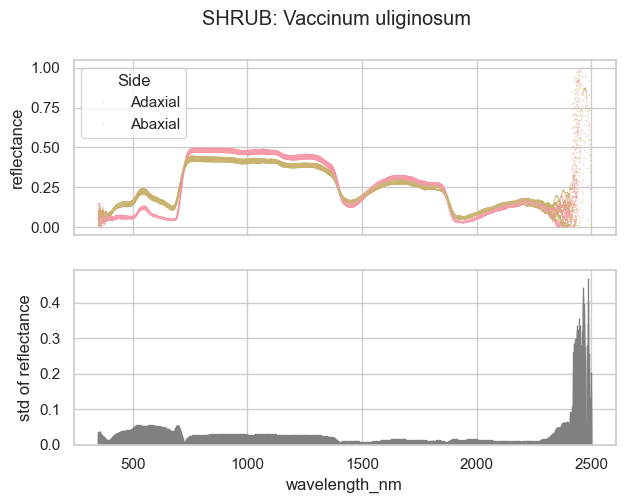

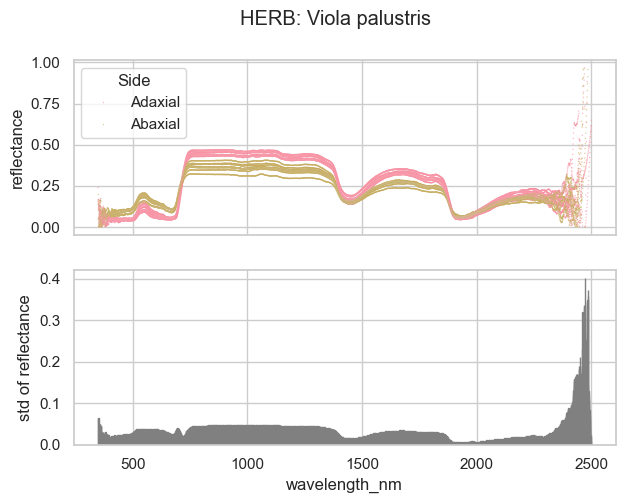

In [ ]:
# loop through Species in dataframe
grouped = df.groupby("Species")
for name, group in grouped:
    # create title
    ft = group["PFT"].iloc[0] #assume that they are all correctly assigned, the first PFT is correct
    label = f"{ft.upper()}: {name.replace('_', ' ')}"
    print(f"plotting {label}")

    # reformat data
    subset = group.melt(id_vars=["Sample", "Location", "Species", "PFT", "Side"],
                                                  var_name="wavelength_nm", value_name="reflectance")
    subset["wavelength_nm"] = subset["wavelength_nm"].astype('float32')

    # keep reflectance values within reasonable values
    subset["reflectance"] = subset["reflectance"].where(subset.reflectance <= 1).where(subset.reflectance >= 0)

    # set up figure
    graph, (ax1, ax2) = plt.subplots(2,1, figsize = (7,5), sharex=True)
    graph.suptitle(label)
    ax2.set_ylabel("std of reflectance")

    # plot reflectance and its standard deviation
    if ft.upper() != "MOSS":
        sns.scatterplot(data=subset, x="wavelength_nm", y="reflectance", hue="Side", s=1, alpha=.5, ax=ax1)
    else:
        sns.scatterplot(data=subset, x="wavelength_nm", y="reflectance", s=1, alpha=.5, ax=ax1) # no information on side (perspective) the spectrum was recorded

    sns.barplot(data = subset, x="wavelength_nm", y = "reflectance", errorbar=None, estimator="std", native_scale=True, edgecolor="grey", alpha=1.0, ax=ax2)
    # plt.tight_layout()
    plt.savefig(fname=f"{fig_out}/SpeciesPlots_{ft.upper()}-{name}.jpg")
    plt.close()
